In [139]:
import pandas as pd

In [140]:
df = pd.read_csv('Data.csv')
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


# For every column in the data:

## a. State whether the values match the description given in the table above

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


### booking_id:
Nominal. The unique identifier of the booking.
Missing values are not possible due to the database structure.

In [142]:
df['booking_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1500 entries, 0 to 1499
Series name: booking_id
Non-Null Count  Dtype
--------------  -----
1500 non-null   int64
dtypes: int64(1)
memory usage: 11.8 KB


In [143]:
df['booking_id'].nunique()

1500

### months_as_member
Discrete. The number of months as this fitness club member,
minimum 1 month.


In [144]:
df['months_as_member'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1500 entries, 0 to 1499
Series name: months_as_member
Non-Null Count  Dtype
--------------  -----
1500 non-null   int64
dtypes: int64(1)
memory usage: 11.8 KB


In [145]:
df['months_as_member'].min()

1

### weight 
Continuous. The member's weight in kg, rounded to 2 decimal
places. The minimum possible value is 40.00 kg.

In [146]:
df['weight'].min()

55.41

### days_before 
Discrete. The number of days before the class the member
registered, minimum 1 day

In [147]:
df['days_before'].min()

'1'

### day_of_week 
Nominal. The day of the week of the class. One of “Mon”, “Tue”,
“Wed”, “Thu”, “Fri”, “Sat” or “Sun”.

In [148]:
df['day_of_week'].unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Wednesday', 'Fri.', 'Tue',
       'Sat', 'Monday'], dtype=object)

### time
Ordinal. The time of day of the class. Either “AM” or “PM”.

In [149]:
df['time'].unique()

array(['PM', 'AM'], dtype=object)

### category 
Nominal. The category of the fitness class. One of “Yoga”, “Aqua”,
“Strength”, “HIIT”, or “Cycling”.

In [150]:
df['category'].unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', '-', 'Aqua'], dtype=object)

### attended 
Nominal. Whether the member attended the class (1) or not (0).

In [151]:
df['attended'].unique()

array([0, 1], dtype=int64)

## b. State the number of missing values in the column.

In [152]:
df.isna().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

## Describe what you did to make values match the description if they did not match.

### weight: Replace missing values with the overall average weight.
### category: Replace missing values with “unknown”.

In [153]:
df['weight'].fillna(df['weight'].mean(), inplace=True)
df['category'].replace('-', 'unknown', inplace=True)

In [154]:
df.isna().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

# 2. Create a visualization that shows how many bookings attended the class. Use the visualization to:

## a. State which category of the variable attended has the most observations.

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\ebrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category', ylabel='count'>

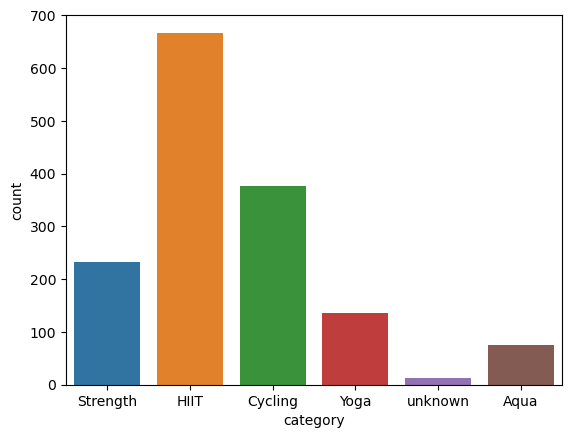

In [156]:
sns.countplot(df['category'])

## b. Explain whether the observations are balanced across categories of the variable attended.

c:\Users\ebrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='attended', ylabel='count'>

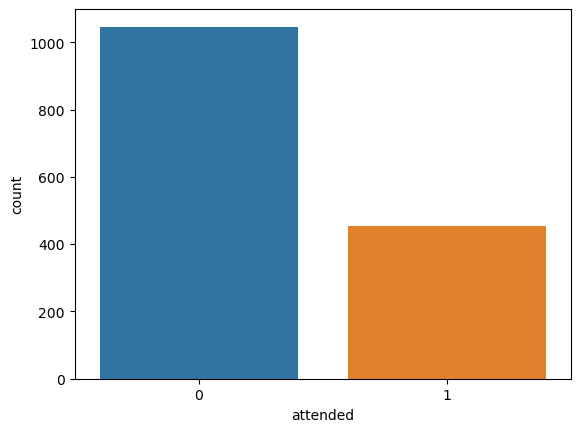

In [157]:
sns.countplot(df['attended'])

In [158]:
df['attended'].value_counts()

0    1046
1     454
Name: attended, dtype: int64

# 3. Describe the distribution of the number of months as a member.

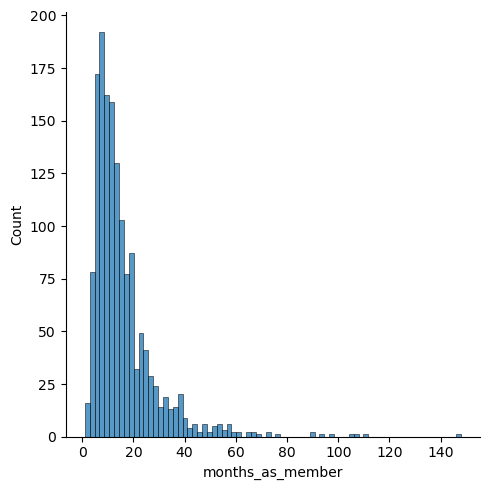

In [159]:
sns.displot(df['months_as_member'])

# 4. Describe the relationship between attendance and number of months as a member.

<AxesSubplot:xlabel='attended', ylabel='months_as_member'>

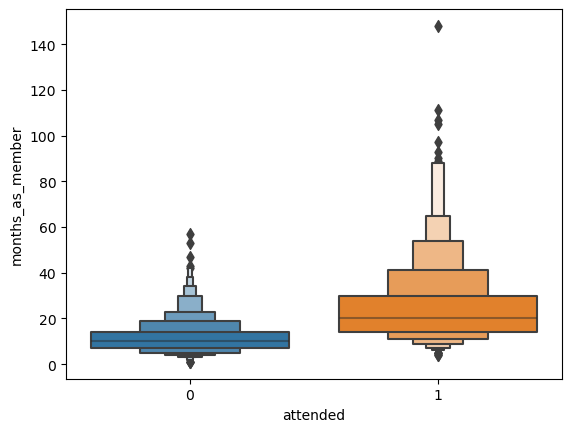

In [160]:
sns.boxenplot(data=df, x="attended", y="months_as_member")

# 5. The business wants to predict whether members will attend using the data provided.State the type of machine learning problem that this is (regression/classification/clustering).
# 6. Fit a baseline model to predict whether members will attend using the data provided.
# 7. Fit a comparison model to predict whether members will attend using the data provided.
# 8. Explain why you chose the two models used in parts 6 and 7.
# 9. Compare the performance of the two models used in parts 6 and 7, using any method suitable.
# 10. Explain which model performs better and why.


In [161]:
from sklearn.preprocessing import LabelEncoder

In [162]:
le = LabelEncoder()

In [163]:
y = df.pop('attended')

In [164]:
encoded_time = pd.get_dummies(df['time'])
encoded_time['AM']

0       0
1       1
2       1
3       1
4       1
       ..
1495    1
1496    1
1497    1
1498    1
1499    1
Name: AM, Length: 1500, dtype: uint8

In [165]:
# Prepare Data
df.drop('booking_id', inplace=True, axis=1)
df['days_before'] = df['days_before'].str.rstrip(' days')
df['days_before'].astype('int64')
df['day_of_week'].replace('Wednesday', 'Wed', inplace=True)
df['day_of_week'].replace('Fri.', 'Fri', inplace=True)
df['day_of_week'].replace('Monday', 'Mon', inplace=True)
encoded_day_of_week = le.fit_transform(df['day_of_week'])
df['day_of_week'] = encoded_day_of_week
df['day_of_week'].astype('int64')
df['time'] = encoded_time['AM']
encoded_category = le.fit_transform(df['category'])
df['category'] = encoded_category


In [166]:
df.head()

,months_as_member,weight,days_before,day_of_week,time,category
0,17,79.56,8,6,0,3
1,10,79.01,2,1,1,2
2,16,74.53,14,3,1,3
3,5,86.12,10,0,1,1
4,15,69.29,8,4,1,2


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   months_as_member  1500 non-null   int64  
 1   weight            1500 non-null   float64
 2   days_before       1500 non-null   object 
 3   day_of_week       1500 non-null   int32  
 4   time              1500 non-null   uint8  
 5   category          1500 non-null   int32  
dtypes: float64(1), int32(2), int64(1), object(1), uint8(1)
memory usage: 48.5+ KB


In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

In [169]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1, 10, 20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1, 5, 10]
        }
    }
}

In [170]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(df, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
results = pd.DataFrame(scores, columns=['model','best_score','best_params'])
results

,model,best_score,best_params
0,svm,0.771333,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.757333,{'n_estimators': 10}
